In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import json

In [2]:
df = pd.read_csv("DATA/main_cleaned.csv")

In [3]:
df.columns
df.head()

,Unnamed: 0,Provider Id,Provider City,Provider State,Provider name,Hospital Ownership,Hospital overall rating,Average Total Payments,Average Medicare Payments,BEDS,Cost
0,0,10001,DOTHAN,AL,SOUTHEAST ALABAMA MEDICAL CENTER,Government,3,5777.24,4763.73,420.0,1013.51
1,92,10001,DOTHAN,AL,SOUTHEAST ALABAMA MEDICAL CENTER,Government,3,4894.76,3865.50,420.0,1029.26
2,184,10001,DOTHAN,AL,SOUTHEAST ALABAMA MEDICAL CENTER,Government,3,10260.21,9167.08,420.0,1093.13
3,276,10001,DOTHAN,AL,SOUTHEAST ALABAMA MEDICAL CENTER,Government,3,6542.08,5438.50,420.0,1103.58
4,368,10001,DOTHAN,AL,SOUTHEAST ALABAMA MEDICAL CENTER,Government,3,4596.39,3618.93,420.0,977.46


In [4]:
# Check to see if there are any rows with missing data
df.count()

Unnamed: 0                   122360
Provider Id                  122360
Provider City                122360
Provider State               122360
Provider name                122360
Hospital Ownership           122360
Hospital overall rating      122360
 Average Total Payments      122360
Average Medicare Payments    122360
BEDS                         122360
Cost                         122360
dtype: int64

In [5]:
# Reorganizing the columns
organized_df = df[["Provider State","Hospital overall rating"]]
organized_df.head()

,Provider State,Hospital overall rating
0,AL,3
1,AL,3
2,AL,3
3,AL,3
4,AL,3


In [50]:
#Calculate the average rating per state
organized_df = organized_df.groupby(['Provider State']).mean()
organized_df.sort_values(by='Hospital overall rating',inplace=True,ascending=False)
organized_df

,Hospital overall rating
Provider State,
VT,4.270270
MT,4.230435
NH,4.143826
WI,4.099671
UT,4.051188
SD,4.000000
CO,3.961563
ID,3.946809
MN,3.896070


In [51]:
#reset index
organized_df.reset_index(inplace=True)

In [52]:
organized_df.head()

,Provider State,Hospital overall rating
0,VT,4.270270
1,MT,4.230435
2,NH,4.143826
3,WI,4.099671
4,UT,4.051188


In [53]:
overall_rating = organized_df['Hospital overall rating'].tolist()
states = organized_df['Provider State'].tolist()

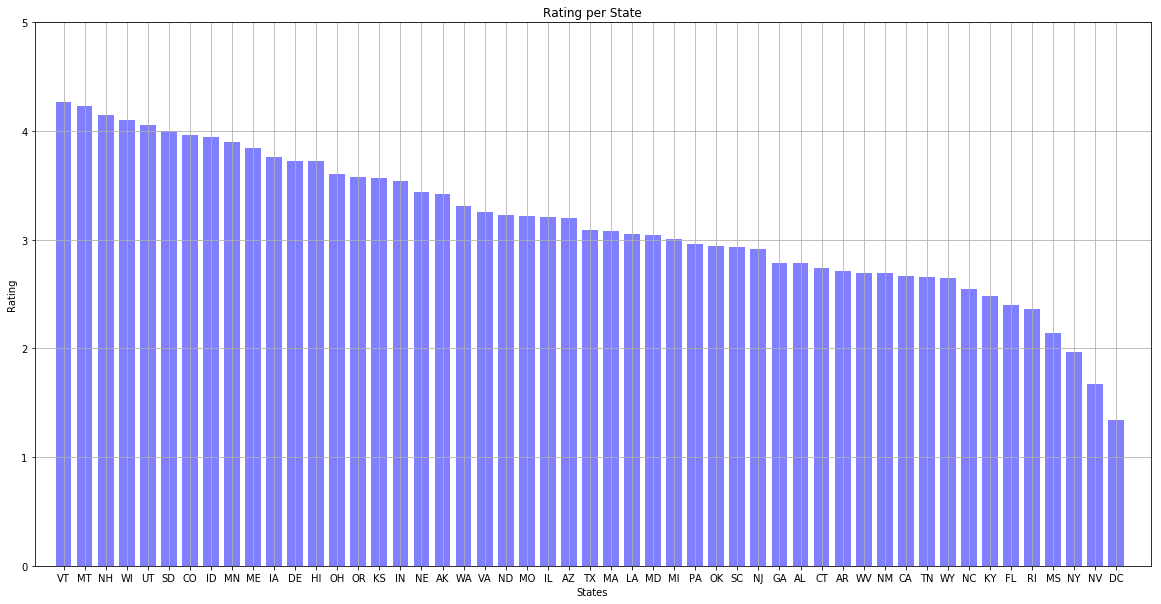

In [54]:
plt.figure(figsize=(20,10))
x_axis = np.arange(len(states))

#Create bar chart
width=.75
plt.bar(x_axis,overall_rating, color='b', width=width ,alpha=0.5, align="edge")


# Give our chart some labels and a tile
plt.title("Rating per State")
plt.xlabel("States")
plt.ylabel("Rating")


# Tell matplotlib where we would like to place each of our x axis headers

tick_locations = [value+width/2 for value in x_axis]
plt.xticks(tick_locations, states)



# Sets the y limits of the current chart

plt.ylim(0,5)
plt.xlim(-1,52)

plt.grid(True)